In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 346M/346M [00:16<00:00, 25.0MB/s]
100% 346M/346M [00:16<00:00, 22.2MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/intel-image-classification.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import os , cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense,Input,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [6]:
image=ImageDataGenerator(rescale=1/255.)

In [12]:
train='/content/seg_train/seg_train'
test='/content/seg_test/seg_test'

traindata=image.flow_from_directory(train,target_size=(256,256),batch_size=32,shuffle=True,class_mode='categorical',subset='training')
testdata=image.flow_from_directory(test,target_size=(256,256),batch_size=32,shuffle=False,class_mode='categorical')


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [13]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
#creating CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(6, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [16]:
from keras import callbacks 

In [17]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=50)

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(traindata,epochs=100,validation_data=testdata,callbacks=[callback])

Epoch 1/100
439/439 [==============================] - 60s 110ms/step - loss: 8.2601 - accuracy: 0.6191 - val_loss: 9.0931 - val_accuracy: 0.5137
Epoch 2/100
439/439 [==============================] - 46s 104ms/step - loss: 5.6542 - accuracy: 0.7022 - val_loss: 8.1337 - val_accuracy: 0.6207
Epoch 3/100
439/439 [==============================] - 45s 103ms/step - loss: 3.7368 - accuracy: 0.7636 - val_loss: 27.1594 - val_accuracy: 0.3803
Epoch 4/100
439/439 [==============================] - 48s 109ms/step - loss: 1.9677 - accuracy: 0.8149 - val_loss: 3.9780 - val_accuracy: 0.6543
Epoch 5/100
439/439 [==============================] - 52s 119ms/step - loss: 1.1907 - accuracy: 0.8570 - val_loss: 4.5948 - val_accuracy: 0.6640
Epoch 6/100
439/439 [==============================] - 46s 104ms/step - loss: 0.8097 - accuracy: 0.8899 - val_loss: 4.8325 - val_accuracy: 0.6470
Epoch 7/100
439/439 [==============================] - 47s 107ms/step - loss: 0.6129 - accuracy: 0.9103 - val_loss: 4.8684 

In [21]:
len(history.history['loss'])

100

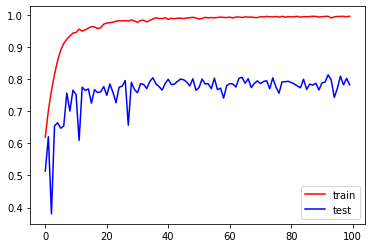

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

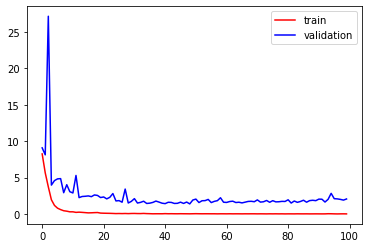

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

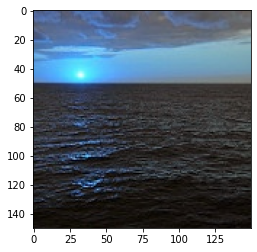

In [28]:
test_img=cv2.imread('/content/seg_pred/seg_pred/10038.jpg')
plt.imshow(test_img)

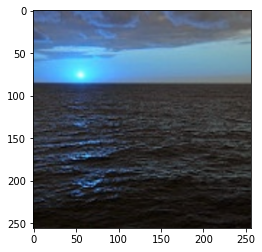

In [29]:
test_img.shape
test_img_scale=cv2.resize(test_img,(256,256))
plt.imshow(test_img_scale)

In [30]:
test_input=test_img_scale.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)